## Assignment 6 Solutions

### 1.  Regression

We begin by including the provided functions to work with regression models:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For this assignment, I'm choosing ggplot
matplotlib.style.use('ggplot')

# (c) 2014 Reid Johnson
#
# Functions to work with continuous data and linear regression models.

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
            i += 1

    pl.show()

Next, we load the Iris flower dataset:

In [3]:
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', \
                                   'Petal Length', 'Petal Width', 
                                   'Species'], header=None)
iris = iris.dropna()

Now we call one of the provided functions to generate a scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination
of features:

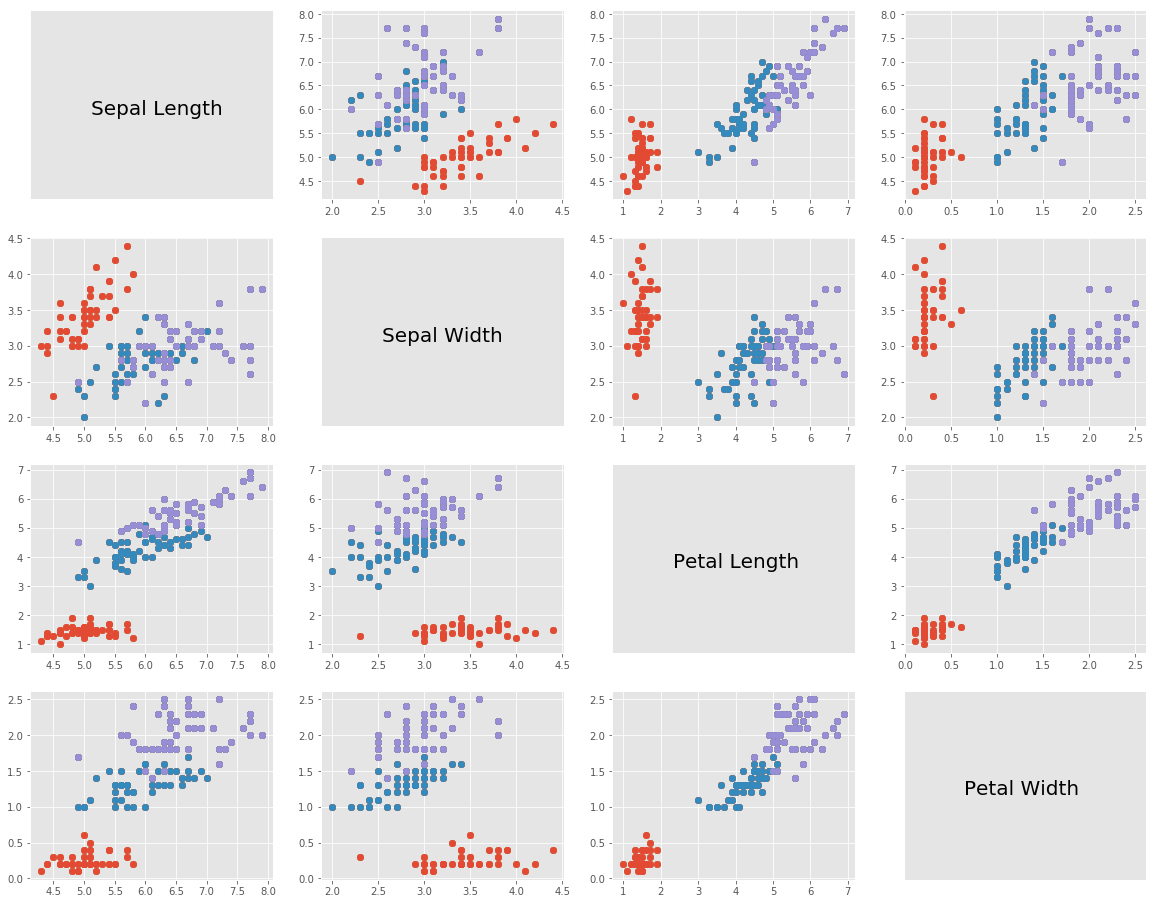

In [14]:
pairs(iris)

Next, we run and generate a plot of the linear regression models generated on each pairwise combination of features, and provide corresponding model statistics.

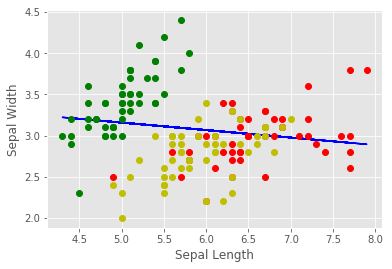

Coefficient(s):  [[-0.09100797]]
Residual sum of squares: 0.22
Variance score: -0.12





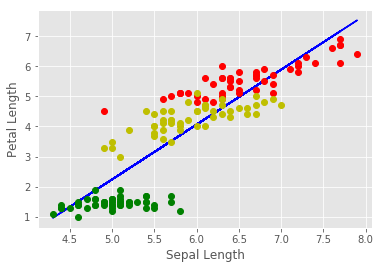

Coefficient(s):  [[ 1.82383123]]
Residual sum of squares: 0.80
Variance score: 0.73





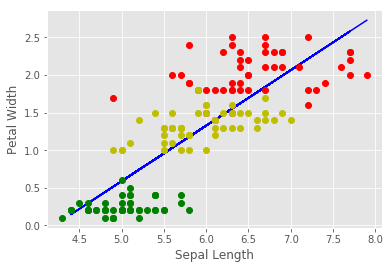

Coefficient(s):  [[ 0.73780592]]
Residual sum of squares: 0.17
Variance score: 0.71





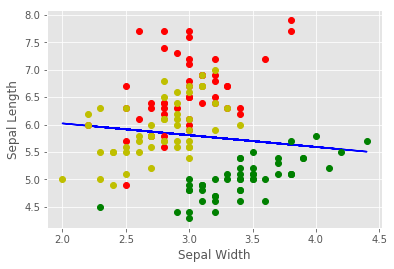

Coefficient(s):  [[-0.2145009]]
Residual sum of squares: 0.63
Variance score: -0.05





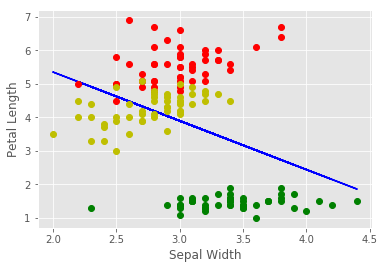

Coefficient(s):  [[-1.45742184]]
Residual sum of squares: 2.17
Variance score: 0.26





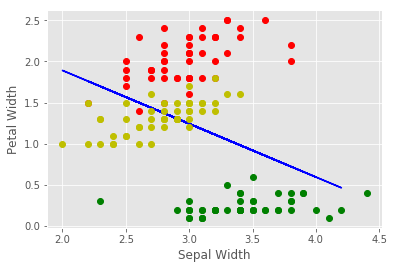

Coefficient(s):  [[-0.6477994]]
Residual sum of squares: 0.48
Variance score: 0.14





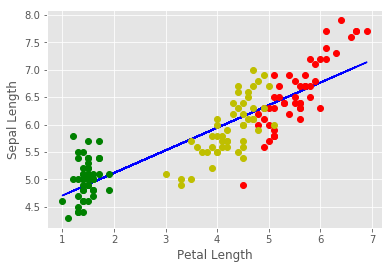

Coefficient(s):  [[ 0.41149274]]
Residual sum of squares: 0.13
Variance score: 0.76





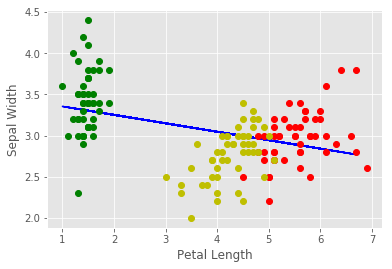

Coefficient(s):  [[-0.1025064]]
Residual sum of squares: 0.12
Variance score: 0.17





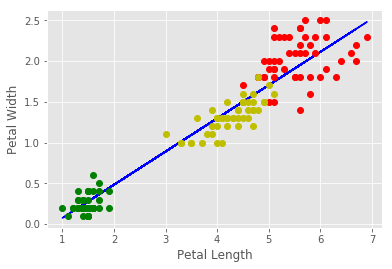

Coefficient(s):  [[ 0.40717694]]
Residual sum of squares: 0.04
Variance score: 0.92





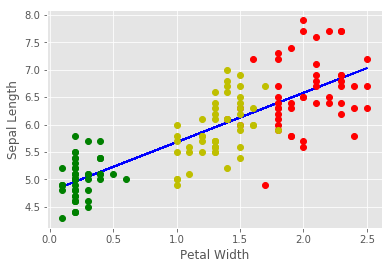

Coefficient(s):  [[ 0.89833897]]
Residual sum of squares: 0.13
Variance score: 0.74





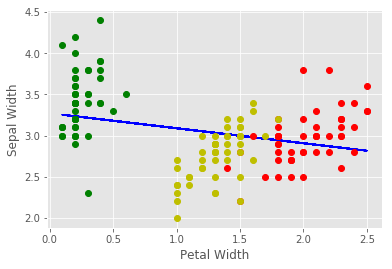

Coefficient(s):  [[-0.18194334]]
Residual sum of squares: 0.16
Variance score: 0.18





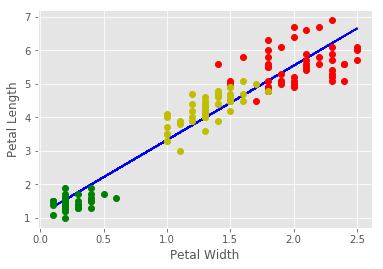

Coefficient(s):  [[ 2.22089196]]
Residual sum of squares: 0.20
Variance score: 0.93





In [20]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model

def plot_and_statistics(iris, feature1, feature2):
    train_set, test_set = train_test_split(iris)
    regr = sklearn.linear_model.LinearRegression()
    x_train = train_set.iloc[:, feature1].values.reshape(-1, 1)
    y_train = train_set.iloc[:, feature2].values.reshape(-1, 1)
    x_test = test_set.iloc[:, feature1].values.reshape(-1, 1)
    y_test = test_set.iloc[:, feature2].values.reshape(-1, 1)

    regr = regr.fit(x_train, y_train)
    pl.plot(x_train, regr.predict(x_train), color='b')
    colors = ['r','g','y']
    for color,name in enumerate(set(iris['Species'])):
        cond = iris['Species'] == name
        pl.plot(iris.iloc[:, feature1][cond], iris.iloc[:, feature2][cond], 
                linestyle='none', marker='o', label=name, color=colors[color])

    label = iris.columns[feature1]
    pl.xlabel(label)
    pl.ylabel(iris.columns[feature2])

    pl.show()

    # The coefficient(s).
    print ("Coefficient(s): ", regr.coef_)

    # The mean square error.
    print ("Residual sum of squares: %.2f" % np.mean(((regr.predict(x_test) - y_test) ** 2)))

    # Explained variance score (1 is perfect prediction).
    print ("Variance score: %.2f" % regr.score(x_test, y_test))

for independent in range(4):
    for dependent in range(4):
        if independent != dependent:
            plot_and_statistics(iris, independent, dependent)
            print ("\n\n")

Next, we plot the best overall linear regression model we were able to generate using any combination of features (including the use of multiple features used in combination to predict a single feature), with corresponding model statistics. We do this by trying all combinations of predictor features with respect to each target feature, plotting the single model that results in the minimial mean squared error (MSE).

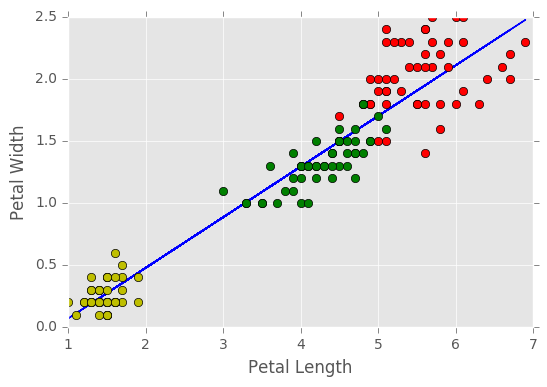

Coefficient(s):  [[ 0.40821475]]
Residual sum of squares: 0.04
Variance score: 0.93


In [26]:
import itertools as iter

def pset(lst):
    comb = (iter.combinations(lst, l) for l in range(len(lst) + 1))
    return list(iter.chain.from_iterable(comb))

def statistics(iris, feature1, feature2):
    train_set, test_set = sklearn.cross_validation.train_test_split(iris)
    regr = sklearn.linear_model.LinearRegression()
    x_train = train_set.ix[:, feature1]
    y_train = train_set.ix[:, feature2]
    x_test = test_set.ix[:, feature1]
    y_test = test_set.ix[:, feature2]

    regr = regr.fit(x_train, y_train)

    # The mean square error.
    mse = np.mean(((regr.predict(x_test.values) - y_test.values) ** 2))
    
    return (mse, (feature1, feature2))

best_mse = float("inf")
best_feats = None
for dependent in range(4):
    independents = []
    for independent in range(4):
        if dependent != independent:
            independents.append(independent)
    for s in pset(independents):
        if s:
            (mse, (feature1, feature2)) = statistics(iris, s, (dependent, ))
            if mse < best_mse:
                best_mse = mse
                best_feats = (feature1, feature2)

plot_and_statistics(iris, best_feats[0], best_feats[1])

### 1 - Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.

Based on the linear models generated, the pair of features that appear to be most predictive for one another are petal length and petal width.

### 2 - Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

Removing the petal width feature (the best predicted feature) would not have a significant effect on classification performance, because its predictability from the other features is also a measure of its redundancy with respect to the other features. Basically, the majority of the information that can be obtained from petal width can also be obtained from some formula involving the other three features.